In [6]:
! pip3 install h5py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 18.0 MB/s eta 0:00:00a 0:00:01


In [1]:
import sys
sys.path.append('./qdarts')

from qdarts.experiment import Experiment
from qdarts.plotting import plot_polytopes



import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import utilities.config as c
import utilities.utils  as u
#import torch


In [132]:
# Define the system
c.set_global_K(3)
C_DD, C_DG = u.generate_capacitance_matrices()
tcs = np.zeros((c.K,c.K))
#All capacitances are given in aF
N = 3 #number of dots   

C_DG[2,0:3] /= 100
C_DG[0:3,2] /= 100
# Definition of the tunnel couplings in eV 
# NOTE: we use the convention that tc is the energy gap at avoided crossing H = tc/2 sx
tunnel_couplings = np.zeros((N,N))
tunnel_couplings[0,1] = 50*1e-6
tunnel_couplings[1,0] = 50*1e-6

In [133]:
C_DG

array([[1.53689966e+01, 1.10425966e+00, 1.24589934e-02],
       [1.17089648e+00, 9.14488814e+00, 1.15625523e-02],
       [7.90609782e-03, 8.87883225e-03, 1.78719587e-03]])

In [ ]:

capacitance_config = {
        "C_DD" : C_DD,  #dot-dot capacitance matrix
        "C_Dg" : C_DG,  #dot-gate capacitance matrix
        "ks" : None,       #distortion of Coulomb peaks. NOTE: If None -> constant size of Coublomb peak 
}

tunneling_config = {
        "tunnel_couplings": tunnel_couplings, #tunnel coupling matrix
        "temperature": 0.2,                   #temperature in Kelvin
        "energy_range_factor": 5,  #energy scale for the Hamiltonian generation. NOTE: Smaller -> faster but less accurate computation 
}

sensor_config = {
        "sensor_dot_indices": [2],  #Indices of the sensor dots
        "sensor_detunings": [-0.06],  #Detuning of the sensor dots
        "noise_amplitude": {"fast_noise": 0.8*1e-6, "slow_noise": 1e-8}, #Noise amplitude for the sensor dots in eV
        "peak_width_multiplier": 25,  #Width of the sensor peaks in the units of thermal broadening m *kB*T/0.61.
}

In [151]:
experiment = Experiment(capacitance_config=capacitance_config, 
                        tunneling_config=tunneling_config, 
                        sensor_config=sensor_config)

EXPERIMENT INITIALIZED
-----------------------

                Capacitance model deployed with the following parameters:
                Dot-dot capacitances: 
                [[18.6012231   0.88206751  0.88206751]
 [ 0.88206751 12.35410736  0.88206751]
 [ 0.88206751  0.88206751 20.43251924]]
                Dot-gate capacitances: 
                [[1.53689966e+01 1.10425966e+00 1.24589934e-02]
 [1.17089648e+00 9.14488814e+00 1.15625523e-02]
 [7.90609782e-03 8.87883225e-03 1.78719587e-03]]
                Size of Coulomb peaks V[n] is constant
                

            Sensor model deployed with the following parameters:   
            Sensor dot indices: [2]
            Sensor detunings: [-60.] meV
            Coulomb peak width: 0.68 meV
            Slow noise amplitude: 0.01 ueV
            Fast noise amplitude: 0.8 ueV
            

            Tunneling model deployed with the following parameters:
            Tunneling matrix:
            [[0.e+00 5.e-05 0.e+00]
 [5.e-05 0.e

In [152]:
experiment = Experiment(capacitance_config=capacitance_config, 
                        tunneling_config=tunneling_config, 
                        sensor_config=sensor_config)

EXPERIMENT INITIALIZED
-----------------------

                Capacitance model deployed with the following parameters:
                Dot-dot capacitances: 
                [[18.6012231   0.88206751  0.88206751]
 [ 0.88206751 12.35410736  0.88206751]
 [ 0.88206751  0.88206751 20.43251924]]
                Dot-gate capacitances: 
                [[1.53689966e+01 1.10425966e+00 1.24589934e-02]
 [1.17089648e+00 9.14488814e+00 1.15625523e-02]
 [7.90609782e-03 8.87883225e-03 1.78719587e-03]]
                Size of Coulomb peaks V[n] is constant
                

            Sensor model deployed with the following parameters:   
            Sensor dot indices: [2]
            Sensor detunings: [-60.] meV
            Coulomb peak width: 0.68 meV
            Slow noise amplitude: 0.01 ueV
            Fast noise amplitude: 0.8 ueV
            

            Tunneling model deployed with the following parameters:
            Tunneling matrix:
            [[0.e+00 5.e-05 0.e+00]
 [5.e-05 0.e

In [153]:
xexp, yexp, _, polytopesexp, sensor_signalexp, _ = experiment.generate_CSD(
                                                plane_axes = np.array([[1,0,0],[0,1,0]]), # vectors spanning the cut in voltage space
                                                target_state = [1,0,5],  # target state for transition
                                                target_transition = [-1,1,0], #target transition from target state, here transition to [2,3,2,3,5,5]
                                                x_voltages=np.linspace(-0.01, 0.02, 100), #voltage range for x-axis
                                                y_voltages=np.linspace(-0.01, 0.02, 100), #voltage range for y-axis
                                                compute_polytopes = True,
                                                #compensate_sensors=True, #compensate the sensors
                                                 #compute the corners of constant occupation
                                                use_sensor_signal=True) #use the sensor signals

v_offset found: [-3.13985116e-01 -5.05535415e-01  4.38645131e+02]


(<Figure size 256x256 with 1 Axes>, <Axes: >)

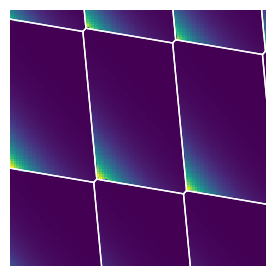

In [154]:
%matplotlib inline
u.plot_CSD(xexp, yexp, sensor_signalexp[:,:,0], polytopesexp)


In [8]:
plot

<Figure size 256x256 with 1 Axes>

In [7]:
ax

<Axes: >